In [1]:
import pandas as pd

In [2]:
geno_file = '/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Adipose-Subcutaneous_Euro/chr1_SNP_intersect.tsv'
express_file = '/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Adipose-Subcutaneous_Euro/Adipose-Subcutaneous-peer_residuals.tsv'
cov_file = '/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Adipose-Subcutaneous_Euro/chr1_covariance_intersect.tsv'

genotype = pd.read_csv(geno_file, sep='\t', index_col=0)
expression = pd.read_csv(express_file, sep='\t')

covariates = pd.read_csv(cov_file, sep='\t', index_col=0)

In [8]:
expression

,GTEX.111CU,GTEX.111FC,GTEX.111VG,GTEX.111YS,GTEX.1122O,GTEX.1128S,GTEX.11DXX,GTEX.11DZ1,GTEX.11EI6,GTEX.11EM3,...,GTEX.ZVT4,GTEX.ZVZP,GTEX.ZXES,GTEX.ZXG5,GTEX.ZYFD,GTEX.ZYT6,GTEX.ZYVF,GTEX.ZYY3,GTEX.ZZ64,GTEX.ZZPU
ENSG00000186092.4,-1.171655,-1.128455,-1.783041,0.446865,0.239575,-0.001119,-0.325519,-1.252567,0.634149,-0.150852,...,1.443555,0.431712,-0.959145,0.464796,1.153111,1.580456,0.407709,0.329663,-1.314875,-1.200147
ENSG00000187634.11,-0.190505,0.204191,0.213894,0.680328,-0.165055,1.731509,0.574544,-1.404932,-0.960199,1.074436,...,0.609267,0.075434,-0.082201,-0.099145,0.579395,0.112640,-0.569385,0.293618,0.705963,-0.222621
ENSG00000188976.10,0.121112,0.309671,-0.967035,0.656190,0.197919,-0.029272,-0.010894,-0.183869,-0.509539,0.008714,...,-1.358577,-0.780284,-0.069408,-0.140604,-0.796302,-0.640726,0.624708,1.047049,-0.064045,-1.083184
ENSG00000187961.13,0.485986,-0.626711,1.389952,0.201756,0.581880,-0.189872,0.217535,0.901410,0.106483,-1.668298,...,-1.320478,0.499327,0.442560,0.098723,-0.759254,-0.544463,2.185014,1.564695,0.012382,-0.615451
ENSG00000187583.10,0.316653,0.139140,0.300383,0.961866,-0.737122,-0.832368,-1.776435,0.628792,-0.127065,-1.594285,...,-0.720280,-1.144666,0.664196,-0.671283,-1.846531,0.231329,1.708413,1.355871,1.580960,0.114748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000165246.13,0.009985,0.058389,0.070261,-0.195465,-0.244874,-0.403371,-0.562356,1.104758,0.857127,-0.786260,...,-0.726946,0.396378,-0.355327,-0.137052,-0.576707,1.148088,-1.242239,-1.471963,1.375126,-0.359036
ENSG00000012817.15,0.882414,-0.035082,0.361135,1.273342,-1.089938,-0.065591,-0.354896,0.301333,0.961700,-0.070569,...,-0.638723,0.029435,-0.901226,0.797323,0.190377,-0.173398,-0.078241,0.111351,0.043169,-0.720373
ENSG00000198692.9,-0.019497,-0.243359,0.478213,0.358658,-0.588599,-1.440966,-0.757396,-0.139769,0.752797,-0.847391,...,-0.915037,0.122885,-1.288756,0.272201,1.984723,-0.102174,-0.739451,-1.221700,0.637563,-0.759540
ENSG00000198786.2,0.238917,-0.825298,-0.932220,0.921836,1.259313,-1.150807,0.132785,-1.070995,1.474831,0.455622,...,-0.530950,-0.795410,-0.083527,-1.221501,-1.317828,-1.019682,-0.271051,1.532048,-0.418476,0.065387


In [10]:
expression.columns = expression.columns.str.replace('.', '-')

In [11]:
expression

,GTEX-111CU,GTEX-111FC,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-11DXX,GTEX-11DZ1,GTEX-11EI6,GTEX-11EM3,...,GTEX-ZVT4,GTEX-ZVZP,GTEX-ZXES,GTEX-ZXG5,GTEX-ZYFD,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYY3,GTEX-ZZ64,GTEX-ZZPU
ENSG00000186092.4,-1.171655,-1.128455,-1.783041,0.446865,0.239575,-0.001119,-0.325519,-1.252567,0.634149,-0.150852,...,1.443555,0.431712,-0.959145,0.464796,1.153111,1.580456,0.407709,0.329663,-1.314875,-1.200147
ENSG00000187634.11,-0.190505,0.204191,0.213894,0.680328,-0.165055,1.731509,0.574544,-1.404932,-0.960199,1.074436,...,0.609267,0.075434,-0.082201,-0.099145,0.579395,0.112640,-0.569385,0.293618,0.705963,-0.222621
ENSG00000188976.10,0.121112,0.309671,-0.967035,0.656190,0.197919,-0.029272,-0.010894,-0.183869,-0.509539,0.008714,...,-1.358577,-0.780284,-0.069408,-0.140604,-0.796302,-0.640726,0.624708,1.047049,-0.064045,-1.083184
ENSG00000187961.13,0.485986,-0.626711,1.389952,0.201756,0.581880,-0.189872,0.217535,0.901410,0.106483,-1.668298,...,-1.320478,0.499327,0.442560,0.098723,-0.759254,-0.544463,2.185014,1.564695,0.012382,-0.615451
ENSG00000187583.10,0.316653,0.139140,0.300383,0.961866,-0.737122,-0.832368,-1.776435,0.628792,-0.127065,-1.594285,...,-0.720280,-1.144666,0.664196,-0.671283,-1.846531,0.231329,1.708413,1.355871,1.580960,0.114748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000165246.13,0.009985,0.058389,0.070261,-0.195465,-0.244874,-0.403371,-0.562356,1.104758,0.857127,-0.786260,...,-0.726946,0.396378,-0.355327,-0.137052,-0.576707,1.148088,-1.242239,-1.471963,1.375126,-0.359036
ENSG00000012817.15,0.882414,-0.035082,0.361135,1.273342,-1.089938,-0.065591,-0.354896,0.301333,0.961700,-0.070569,...,-0.638723,0.029435,-0.901226,0.797323,0.190377,-0.173398,-0.078241,0.111351,0.043169,-0.720373
ENSG00000198692.9,-0.019497,-0.243359,0.478213,0.358658,-0.588599,-1.440966,-0.757396,-0.139769,0.752797,-0.847391,...,-0.915037,0.122885,-1.288756,0.272201,1.984723,-0.102174,-0.739451,-1.221700,0.637563,-0.759540
ENSG00000198786.2,0.238917,-0.825298,-0.932220,0.921836,1.259313,-1.150807,0.132785,-1.070995,1.474831,0.455622,...,-0.530950,-0.795410,-0.083527,-1.221501,-1.317828,-1.019682,-0.271051,1.532048,-0.418476,0.065387


In [12]:
cov_col = set(covariates.columns)
#find intersection between genotype and expression samples
geno_col = set(genotype.columns)
exp_col = set(expression.columns)
intersect = (geno_col.intersection(exp_col)).intersection(cov_col)

In [13]:
geno_inter = genotype[intersect]

In [14]:
geno_inter

,GTEX-13OVJ,GTEX-144GL,GTEX-13X6K,GTEX-OHPN,GTEX-183FY,GTEX-T6MN,GTEX-XBEW,GTEX-1LG7Y,GTEX-1F75A,GTEX-1B933,...,GTEX-14JIY,GTEX-SUCS,GTEX-Y5V6,GTEX-146FQ,GTEX-1A8G6,GTEX-1RAZR,GTEX-1S82P,GTEX-1JN76,GTEX-13NZB,GTEX-11TTK
id,,,,,,,,,,,,,,,,,,,,,
chr1_946247,1,2,1,0,2,1,2,1,2,2,...,2,1,2,1,2,0,0,2,2,1
chr1_965125,1,0,1,2,0,1,0,1,0,0,...,0,1,0,0,0,1,1,1,0,1
chr1_973858,1,2,2,2,2,1,1,1,1,1,...,2,2,0,2,0,1,2,0,1,1
chr1_973929,1,0,1,2,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
chr1_974039,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr1_248681658,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,2,1,0,1,1
chr1_248681796,2,2,2,2,2,2,2,1,1,2,...,2,2,2,2,1,0,1,2,1,1
chr1_248682055,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,2,1,0,1,1


In [15]:
genotype

,GTEX-111CU,GTEX-111FC,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-11DXX,GTEX-11DZ1,GTEX-11EI6,GTEX-11EM3,...,GTEX-ZVT4,GTEX-ZVZP,GTEX-ZXES,GTEX-ZXG5,GTEX-ZYFD,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYY3,GTEX-ZZ64,GTEX-ZZPU
id,,,,,,,,,,,,,,,,,,,,,
chr1_946247,1,2,2,1,1,1,1,1,1,2,...,2,2,1,0,1,2,2,2,2,1
chr1_965125,1,0,0,1,0,0,1,1,1,0,...,0,0,1,1,1,0,0,0,0,1
chr1_973858,1,2,1,1,2,2,2,2,2,1,...,1,2,1,1,0,1,0,1,1,1
chr1_973929,1,0,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
chr1_974039,0,0,1,1,0,0,0,0,0,0,...,1,0,1,0,1,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr1_248681658,0,0,0,0,0,1,1,0,0,0,...,1,0,0,2,0,1,1,0,0,0
chr1_248681796,2,2,2,2,2,1,1,2,2,2,...,1,2,2,0,2,1,1,2,2,2
chr1_248682055,0,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,1,1,0,0,0


In [16]:
exp_inter = expression[intersect]

In [17]:
exp_inter

,GTEX-13OVJ,GTEX-144GL,GTEX-13X6K,GTEX-OHPN,GTEX-183FY,GTEX-T6MN,GTEX-XBEW,GTEX-1LG7Y,GTEX-1F75A,GTEX-1B933,...,GTEX-14JIY,GTEX-SUCS,GTEX-Y5V6,GTEX-146FQ,GTEX-1A8G6,GTEX-1RAZR,GTEX-1S82P,GTEX-1JN76,GTEX-13NZB,GTEX-11TTK
ENSG00000186092.4,1.086598,-0.514972,-0.105325,-0.878363,-1.111113,-2.197433,-0.983595,0.195506,1.123251,0.769363,...,0.838809,-0.280764,1.332474,-1.265983,1.409032,0.808492,-0.596322,0.092978,1.122022,1.941139
ENSG00000187634.11,-0.786435,-0.195626,0.758876,0.314503,1.097619,0.803006,0.174337,-0.849347,-0.335842,0.082581,...,-0.533116,-0.398192,-0.209628,-1.192265,0.118498,-0.085857,-0.633174,-0.487528,0.753936,-0.507272
ENSG00000188976.10,0.012279,0.194660,0.805310,-0.134950,-0.123806,0.392353,0.296132,0.317031,-0.835972,0.339721,...,-0.195386,0.354390,-1.571161,-0.657785,0.029981,0.603845,-0.029251,0.435591,-0.439973,0.265432
ENSG00000187961.13,0.987732,-1.405199,-0.751264,1.594313,0.133745,-0.799688,0.284050,-0.999323,-0.149304,-1.051152,...,-0.911802,0.215142,0.178064,-0.335662,-0.404085,-1.095026,0.278372,-0.226591,1.121895,1.469502
ENSG00000187583.10,1.572550,-1.694062,-0.820168,0.124685,0.443509,-0.704442,-0.369331,-1.103547,0.539094,-0.961610,...,0.068553,0.726247,-0.263858,-1.132035,1.773669,0.536186,0.514742,-0.915908,-0.985212,1.577485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000165246.13,-0.687360,0.862265,-0.916370,-0.361856,0.328841,0.185808,0.727627,0.412807,-0.328214,-1.946200,...,0.278243,-0.063078,0.368990,2.546692,-0.237549,0.624904,-0.115369,-0.643707,0.402506,-1.914857
ENSG00000012817.15,-0.300425,-0.020699,-1.238901,-0.084654,1.137634,0.009789,0.373886,1.056657,0.893802,-2.161932,...,-0.144186,0.176776,-0.156116,0.255158,-0.008547,0.035937,-0.489690,-0.380036,0.752596,-1.058428
ENSG00000198692.9,-1.051061,-0.034959,-0.552888,-1.332781,1.514855,-0.422918,0.715601,1.399604,0.054967,-2.437480,...,-0.204397,0.365840,2.907731,0.383211,0.147241,0.871563,-0.588871,-0.494589,0.304188,-1.056094
ENSG00000198786.2,1.061741,0.549071,0.945454,0.363638,0.634607,0.504216,-0.734422,-0.299305,-0.987912,-0.291842,...,0.801430,0.135746,-1.788270,-0.013770,1.677510,-1.298200,1.077668,-0.575316,0.490323,-1.222903


In [18]:
expression

,GTEX-111CU,GTEX-111FC,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-11DXX,GTEX-11DZ1,GTEX-11EI6,GTEX-11EM3,...,GTEX-ZVT4,GTEX-ZVZP,GTEX-ZXES,GTEX-ZXG5,GTEX-ZYFD,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYY3,GTEX-ZZ64,GTEX-ZZPU
ENSG00000186092.4,-1.171655,-1.128455,-1.783041,0.446865,0.239575,-0.001119,-0.325519,-1.252567,0.634149,-0.150852,...,1.443555,0.431712,-0.959145,0.464796,1.153111,1.580456,0.407709,0.329663,-1.314875,-1.200147
ENSG00000187634.11,-0.190505,0.204191,0.213894,0.680328,-0.165055,1.731509,0.574544,-1.404932,-0.960199,1.074436,...,0.609267,0.075434,-0.082201,-0.099145,0.579395,0.112640,-0.569385,0.293618,0.705963,-0.222621
ENSG00000188976.10,0.121112,0.309671,-0.967035,0.656190,0.197919,-0.029272,-0.010894,-0.183869,-0.509539,0.008714,...,-1.358577,-0.780284,-0.069408,-0.140604,-0.796302,-0.640726,0.624708,1.047049,-0.064045,-1.083184
ENSG00000187961.13,0.485986,-0.626711,1.389952,0.201756,0.581880,-0.189872,0.217535,0.901410,0.106483,-1.668298,...,-1.320478,0.499327,0.442560,0.098723,-0.759254,-0.544463,2.185014,1.564695,0.012382,-0.615451
ENSG00000187583.10,0.316653,0.139140,0.300383,0.961866,-0.737122,-0.832368,-1.776435,0.628792,-0.127065,-1.594285,...,-0.720280,-1.144666,0.664196,-0.671283,-1.846531,0.231329,1.708413,1.355871,1.580960,0.114748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000165246.13,0.009985,0.058389,0.070261,-0.195465,-0.244874,-0.403371,-0.562356,1.104758,0.857127,-0.786260,...,-0.726946,0.396378,-0.355327,-0.137052,-0.576707,1.148088,-1.242239,-1.471963,1.375126,-0.359036
ENSG00000012817.15,0.882414,-0.035082,0.361135,1.273342,-1.089938,-0.065591,-0.354896,0.301333,0.961700,-0.070569,...,-0.638723,0.029435,-0.901226,0.797323,0.190377,-0.173398,-0.078241,0.111351,0.043169,-0.720373
ENSG00000198692.9,-0.019497,-0.243359,0.478213,0.358658,-0.588599,-1.440966,-0.757396,-0.139769,0.752797,-0.847391,...,-0.915037,0.122885,-1.288756,0.272201,1.984723,-0.102174,-0.739451,-1.221700,0.637563,-0.759540
ENSG00000198786.2,0.238917,-0.825298,-0.932220,0.921836,1.259313,-1.150807,0.132785,-1.070995,1.474831,0.455622,...,-0.530950,-0.795410,-0.083527,-1.221501,-1.317828,-1.019682,-0.271051,1.532048,-0.418476,0.065387


In [19]:
cov_inter = covariates[intersect]

In [20]:
cov_inter

,GTEX-13OVJ,GTEX-144GL,GTEX-13X6K,GTEX-OHPN,GTEX-183FY,GTEX-T6MN,GTEX-XBEW,GTEX-1LG7Y,GTEX-1F75A,GTEX-1B933,...,GTEX-14JIY,GTEX-SUCS,GTEX-Y5V6,GTEX-146FQ,GTEX-1A8G6,GTEX-1RAZR,GTEX-1S82P,GTEX-1JN76,GTEX-13NZB,GTEX-11TTK
id,,,,,,,,,,,,,,,,,,,,,
SEX,2.0000,1.0000,2.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,1.0000,2.0000
AGE,55.0000,57.0000,61.0000,61.0000,21.0000,51.0000,47.0000,53.0000,54.0000,59.0000,...,63.0000,70.0000,65.0000,37.0000,65.0000,48.0000,62.0000,22.0000,35.0000,69.0000
PC1_178.652,-0.0012,0.0026,0.0001,-0.0043,0.0028,0.0004,-0.0039,-0.0007,0.0008,-0.0003,...,0.0016,-0.0009,-0.0001,-0.0032,0.0008,-0.0010,0.0042,0.0017,0.0029,-0.0030
PC2_119.536,0.0269,0.0237,0.0231,0.0254,0.0239,0.0217,0.0229,0.0225,0.0235,0.0246,...,0.0211,0.0244,0.0229,0.0259,0.0258,0.0274,0.0244,0.0245,0.0202,0.0234
PC3_31.844,-0.0031,-0.0053,-0.0044,-0.0084,-0.0051,0.0038,0.0005,0.0014,-0.0071,-0.0119,...,-0.0005,-0.0036,-0.0035,-0.0094,-0.0058,-0.0035,-0.0037,-0.0079,-0.0028,-0.0129
PC4_11.937,-0.0131,0.0065,0.0132,0.0044,-0.0109,-0.0100,-0.0002,0.0114,0.0179,-0.0006,...,-0.0193,0.0065,0.0255,-0.0041,-0.0055,0.0052,0.0122,-0.0086,0.0044,0.0037
PC5_7.826,0.0045,0.0142,-0.0077,0.0057,-0.0205,0.0205,-0.0077,0.0002,0.0374,-0.0092,...,0.0020,-0.0004,0.0217,0.0088,-0.0257,0.0158,0.0122,0.0019,0.0212,-0.0188
PC6_7.463,-0.0091,0.0023,-0.0174,-0.0087,-0.0145,-0.0334,-0.0082,-0.0141,-0.0011,-0.0009,...,-0.0041,-0.0074,0.0091,-0.0061,0.0136,0.0004,-0.0109,0.0214,-0.0098,-0.0074
PC7_6.971,0.0016,-0.0001,0.0042,-0.0211,-0.0204,-0.0375,-0.0179,-0.0067,-0.0041,0.0096,...,-0.0095,-0.0277,-0.0026,0.0070,-0.0234,0.0030,0.0021,-0.0129,-0.0003,-0.0115


In [21]:
covariates

,GTEX-111CU,GTEX-111FC,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-11DXX,GTEX-11DZ1,GTEX-11EI6,GTEX-11EM3,...,GTEX-ZVT4,GTEX-ZVZP,GTEX-ZXES,GTEX-ZXG5,GTEX-ZYFD,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYY3,GTEX-ZZ64,GTEX-ZZPU
id,,,,,,,,,,,,,,,,,,,,,
SEX,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,2.0000,1.0000,1.0000,2.0000,...,2.0000,1.0000,2.0000,1.0000,1.0000,1.0000,2.0000,2.0000,1.0000,2.0000
AGE,57.0000,61.0000,63.0000,62.0000,64.0000,66.0000,66.0000,58.0000,62.0000,21.0000,...,56.0000,58.0000,38.0000,66.0000,55.0000,30.0000,54.0000,67.0000,24.0000,50.0000
PC1_178.652,-0.0002,-0.0018,-0.0008,0.0020,-0.0003,-0.0007,-0.0006,0.0015,0.0012,0.0009,...,-0.0004,-0.0010,0.0028,-0.0031,0.0017,-0.0003,-0.0015,-0.0024,0.0009,-0.0017
PC2_119.536,0.0235,0.0245,0.0238,0.0252,0.0246,0.0259,0.0246,0.0259,0.0225,0.0221,...,0.0233,0.0256,0.0197,0.0191,0.0241,0.0234,0.0237,0.0197,0.0223,0.0289
PC3_31.844,-0.0056,-0.0029,-0.0051,0.0045,-0.0023,-0.0006,-0.0045,-0.0094,-0.0022,-0.0087,...,-0.0115,-0.0063,-0.0026,-0.0107,0.0020,-0.0069,-0.0095,0.0004,0.0028,-0.0029
PC4_11.937,0.0159,0.0158,0.0049,0.0129,0.0096,0.0140,0.0112,0.0032,0.0003,0.0119,...,0.0017,0.0072,-0.0140,0.0003,0.0095,0.0055,0.0016,-0.0040,-0.0141,0.0029
PC5_7.826,0.0065,0.0030,-0.0441,-0.0049,0.0212,0.0286,0.0184,-0.0057,0.0167,-0.0158,...,-0.0020,0.0110,0.0272,0.0101,0.0232,0.0066,-0.0114,-0.0142,0.0185,0.0003
PC6_7.463,-0.0123,-0.0072,0.0225,-0.0057,-0.0103,0.0164,-0.0088,0.0209,-0.0290,-0.0016,...,-0.0101,-0.0226,-0.0597,0.0201,-0.0230,-0.0222,-0.0181,-0.0099,-0.0067,-0.0029
PC7_6.971,-0.0027,-0.0076,0.0035,-0.0092,0.0043,-0.0117,-0.0098,0.0002,-0.0225,0.0082,...,-0.0191,-0.0162,-0.0104,0.0106,-0.0189,-0.0263,0.0038,-0.0015,0.0153,0.0262


In [29]:
import pandas as pd
import os

In [23]:
data = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/GTEx_Analysis_v8_eQTL/Whole_Blood.v8.egenes.txt.gz', sep='\t')

In [26]:
data['variant_id']

0           chr1_666028_G_A_b38
1            chr1_63671_G_A_b38
2           chr1_666028_G_A_b38
3           chr1_135203_G_A_b38
4           chr1_135203_G_A_b38
                  ...          
20310    chrX_155655744_G_A_b38
20311    chrX_155768714_G_C_b38
20312    chrX_155930748_A_T_b38
20313    chrX_155758735_C_G_b38
20314    chrX_155999338_G_A_b38
Name: variant_id, Length: 20315, dtype: object

In [35]:
variants = []
for filename in os.listdir('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/GTEx_Analysis_v8_eQTL/'):
    if 'egenes' in filename:
        data = pd.read_csv(f'/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/GTEx_Analysis_v8_eQTL/{filename}', sep='\t')
        variants.append(list(data['variant_id']))

In [37]:
variants_flat_list = [item for sublist in variants for item in sublist]


In [39]:
len(variants_flat_list)

1207976

In [42]:
unique_variants = (set(variants_flat_list))

In [43]:
with open('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/GTEx_Analysis_v8_eQTL/ciseqtls_egenes.csv', 'w') as f:
    for var in unique_variants:
        f.write(f'{var}\n')

In [93]:
import matplotlib.pyplot as plt
import numpy as np

In [44]:
genotype = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run4_080221/Whole_Blood/genotype_ARHGEF3.tsv', sep='\t')

In [45]:
genotype

,Unnamed: 0,GTEX-12WSH,GTEX-1B8KE,GTEX-1A3MV,GTEX-139UW,GTEX-1192X,GTEX-WYJK,GTEX-ZV68,GTEX-1AX9J,GTEX-1KD4Q,...,GTEX-147F3,GTEX-XUW1,GTEX-132Q8,GTEX-1OKEX,GTEX-1B8KZ,GTEX-15SB6,GTEX-W5WG,GTEX-13OVG,GTEX-147JS,GTEX-11P81
0,chr3_56815721,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0
1,chr3_56831748,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0
2,chr3_56823405,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0


In [72]:
genotype_0 = [sample.replace('-', '.') for sample in genotype.columns[genotype.iloc[0]==0]]
genotype_1 = [sample.replace('-', '.') for sample in genotype.columns[genotype.iloc[0]==1]]
genotype_2 = [sample.replace('-', '.') for sample in genotype.columns[genotype.iloc[0]==2]]


In [83]:
matrixeqtl = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run4_080221/Whole_Blood/matrixeqtl_results_ARHGEF3', sep='\t')

In [46]:
expression = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run4_080221/Whole_Blood/Whole_Blood_5_peer_residuals.tsv', sep='\t')

Text(0.5, 1.0, 'SLC9A1, ENSG00000090020.10')

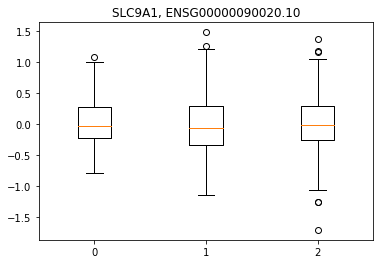

In [104]:
#SLC9A1	 ENSG00000090020.10 
expression_0 = list(expression[genotype_0].loc['ENSG00000090020.10'])
expression_1 = list(expression[genotype_1].loc['ENSG00000090020.10'])
expression_2 = list(expression[genotype_2].loc['ENSG00000090020.10'])
data = [expression_0, expression_1, expression_2]

plt.boxplot(data)
plt.xticks([1, 2, 3], [0, 1, 2])
plt.title('SLC9A1, ENSG00000090020.10')

In [86]:
matrixeqtl[matrixeqtl['gene']=='ENSG00000090020.10']

,SNP,gene,beta,t-stat,p-value,FDR
15455,chr3_56823405,ENSG00000090020.10,-0.052198,-0.895289,0.371017,0.999964
42200,chr3_56815721,ENSG00000090020.10,0.008102,0.133838,0.893579,0.999964
43719,chr3_56831748,ENSG00000090020.10,-0.005839,-0.097050,0.922721,0.999964


Text(0.5, 1.0, 'NIPAL3, ENSG00000001461.16')

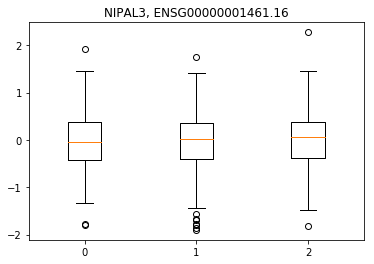

In [103]:
# NIPAL3	ENSG00000001461.16
expression_0 = list(expression[genotype_0].loc['ENSG00000001461.16'])
expression_1 = list(expression[genotype_1].loc['ENSG00000001461.16'])
expression_2 = list(expression[genotype_2].loc['ENSG00000001461.16'])
data = [expression_0, expression_1, expression_2]

plt.boxplot(data)
plt.xticks([1, 2, 3], [0, 1, 2])
plt.title('NIPAL3, ENSG00000001461.16')

In [88]:
matrixeqtl[matrixeqtl['gene']=='ENSG00000001461.16']

,SNP,gene,beta,t-stat,p-value,FDR
24335,chr3_56831748,ENSG00000001461.16,0.035463,0.591837,0.554199,0.999964
32614,chr3_56815721,ENSG00000001461.16,0.022130,0.367002,0.713756,0.999964
41056,chr3_56823405,ENSG00000001461.16,0.009270,0.159486,0.873343,0.999964


Text(0.5, 1.0, 'TPM3, ENSG00000143549.19')

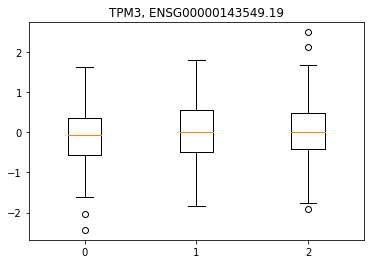

In [102]:
# TPM3		ENSG00000143549.19

expression_0 = list(expression[genotype_0].loc['ENSG00000143549.19'])
expression_1 = list(expression[genotype_1].loc['ENSG00000143549.19'])
expression_2 = list(expression[genotype_2].loc['ENSG00000143549.19'])
data = [expression_0, expression_1, expression_2]

plt.boxplot(data)
plt.xticks([1, 2, 3], [0, 1, 2])
plt.title('TPM3, ENSG00000143549.19')

In [90]:
matrixeqtl[matrixeqtl['gene']=='ENSG00000143549.19']

,SNP,gene,beta,t-stat,p-value,FDR
34537,chr3_56823405,ENSG00000143549.19,0.018675,0.320072,0.749033,0.999964
44845,chr3_56815721,ENSG00000143549.19,-0.004311,-0.071206,0.943260,0.999964
47353,chr3_56831748,ENSG00000143549.19,-0.000705,-0.011716,0.990656,0.999964


Text(0.5, 1.0, 'HPSE, ENSG00000173083.14')

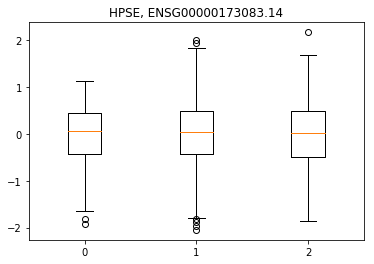

In [101]:
# HPSE		ENSG00000173083.14

expression_0 = list(expression[genotype_0].loc['ENSG00000173083.14'])
expression_1 = list(expression[genotype_1].loc['ENSG00000173083.14'])
expression_2 = list(expression[genotype_2].loc['ENSG00000173083.14'])
data = [expression_0, expression_1, expression_2]

plt.boxplot(data)
plt.xticks([1, 2, 3], [0, 1, 2])
plt.title('HPSE, ENSG00000173083.14')

In [100]:
matrixeqtl[matrixeqtl['gene']=='ENSG00000173083.14']

,SNP,gene,beta,t-stat,p-value,FDR
15435,chr3_56831748,ENSG00000173083.14,0.053821,0.896163,0.370551,0.999964
24103,chr3_56815721,ENSG00000173083.14,0.036180,0.598513,0.549740,0.999964
47440,chr3_56823405,ENSG00000173083.14,-0.000526,-0.009028,0.992800,0.999964


Text(0.5, 1.0, 'top hit (not elife target gene), ENSG00000189050.15')

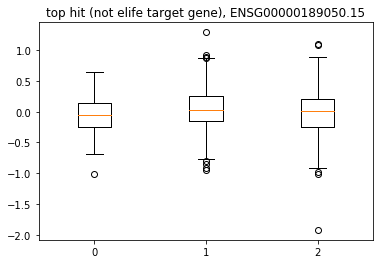

In [105]:
# ENSG00000189050.15

expression_0 = list(expression[genotype_0].loc['ENSG00000189050.15'])
expression_1 = list(expression[genotype_1].loc['ENSG00000189050.15'])
expression_2 = list(expression[genotype_2].loc['ENSG00000189050.15'])
data = [expression_0, expression_1, expression_2]

plt.boxplot(data)
plt.xticks([1, 2, 3], [0, 1, 2])
plt.title('top hit (not elife target gene), ENSG00000189050.15')

In [106]:
matrixeqtl[matrixeqtl['gene']=='ENSG00000189050.15']

,SNP,gene,beta,t-stat,p-value,FDR
0,chr3_56823405,ENSG00000189050.15,0.220295,3.855081,0.000129,0.999964
13,chr3_56815721,ENSG00000189050.15,0.196538,3.303286,0.001017,0.999964
29,chr3_56831748,ENSG00000189050.15,0.186793,3.156173,0.001684,0.999964


Text(0.5, 1.0, 'random gene (not elife target gene), ENSG00000220201.7')

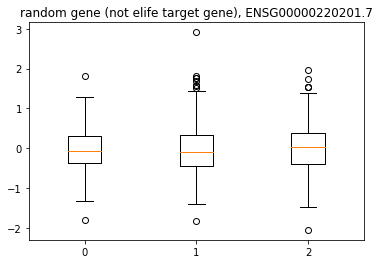

In [107]:
# ENSG00000220201.7

expression_0 = list(expression[genotype_0].loc['ENSG00000220201.7'])
expression_1 = list(expression[genotype_1].loc['ENSG00000220201.7'])
expression_2 = list(expression[genotype_2].loc['ENSG00000220201.7'])
data = [expression_0, expression_1, expression_2]

plt.boxplot(data)
plt.xticks([1, 2, 3], [0, 1, 2])
plt.title('random gene (not elife target gene), ENSG00000220201.7')

In [108]:
matrixeqtl[matrixeqtl['gene']=='ENSG00000220201.7']

,SNP,gene,beta,t-stat,p-value,FDR
2084,chr3_56815721,ENSG00000220201.7,0.111237,1.848183,0.065103,0.999964
16126,chr3_56831748,ENSG00000220201.7,0.052105,0.868984,0.385228,0.999964
35364,chr3_56823405,ENSG00000220201.7,0.017395,0.298987,0.765061,0.999964


In [115]:
?pd.read_csv

In [148]:
data = pd.read_csv('/storage/cynthiawu/scyther-ilmn-pilot-ERCC2/bulkRNAseq_Run1/samples.txt', skiprows=2, sep=' ', header = None, usecols=[10, 12])

In [128]:
data

,10,12
0,JKG1-D312D-11-ng-Rep1_S13-2.bam,/storage/mgymrek/scyther/ilmn-pilot/fastqs/JKG...
1,JKG1-D312D-15-ng-Rep1_S12-3.bam,/storage/mgymrek/scyther/ilmn-pilot/fastqs/JKG...
2,JKG1-D312D-15-ng-Rep1_S12-4.bam,/storage/mgymrek/scyther/ilmn-pilot/fastqs/JKG...
3,JKG1-D312D-16-ng-Rep1_S11-5.bam,/storage/mgymrek/scyther/ilmn-pilot/fastqs/JKG...
4,JKG1-D312D-16-ng-Rep1_S11-6.bam,/storage/mgymrek/scyther/ilmn-pilot/fastqs/JKG...
5,JKG1-D312N-17-ng-Rep1_S10-7.bam,/storage/mgymrek/scyther/ilmn-pilot/fastqs/JKG...
6,JKG1-D312N-17-ng-Rep1_S10-8.bam,/storage/mgymrek/scyther/ilmn-pilot/fastqs/JKG...
7,JKG1-D312N-1-ng-Rep1_S9-10.bam,/storage/mgymrek/scyther/ilmn-pilot/fastqs/JKG...
8,JKG1-D312N-1-ng-Rep1_S9-9.bam,/storage/mgymrek/scyther/ilmn-pilot/fastqs/JKG...
9,JKG1-D312N-3-ng-Rep1_S8-11.bam,/storage/mgymrek/scyther/ilmn-pilot/fastqs/JKG...


In [141]:
sample_name = data[10].str.replace('bam', 'vcf')
sample_name.to_csv('/storage/cynthiawu/scyther-ilmn-pilot-ERCC2/bulkRNAseq_Run1/sample_name.txt', index=False, header=None)

In [ ]:
.sortedByCoord.out.bam

In [134]:
replace = data[12].replace('toTranscriptome.out.bam', '.sortedByCoord.out.bam')

In [135]:
replace[0]

'/storage/mgymrek/scyther/ilmn-pilot/fastqs/JKG1-D312D-11-ng-Rep1-FQTKv2_ds.1d19aa97ec594443b991e1f5568e03e2/JKG1-D312D-11-ng-Rep1_S13_L001Aligned.toTranscriptome.out.bam'

In [149]:
data[12] = data[12].str.replace('toTranscriptome.out.bam', 'sortedByCoord.out.bam')

In [150]:
sample_file = data[12]

sample_file.to_csv('/storage/cynthiawu/scyther-ilmn-pilot-ERCC2/bulkRNAseq_Run1/sample_file.txt', index=False, header=None)


In [151]:
sample_file[0]

'/storage/mgymrek/scyther/ilmn-pilot/fastqs/JKG1-D312D-11-ng-Rep1-FQTKv2_ds.1d19aa97ec594443b991e1f5568e03e2/JKG1-D312D-11-ng-Rep1_S13_L001Aligned.sortedByCoord.out.bam'